In [1]:
import anndata
import networkx as nx
import scanpy as sc
import scglue
from matplotlib import rcParams

In [2]:
atac = anndata.read_h5ad("sce_atac.h5ad")
atac.var_names_make_unique()
atac

AnnData object with n_obs × n_vars = 73872 × 185389
    obs: 'orig.ident', 'nCount_peaks', 'nFeature_peaks', 'TSS_fragments', 'DNase_sensitive_region_fragments', 'enhancer_region_fragments', 'promoter_region_fragments', 'on_target_fragments', 'blacklist_region_fragments', 'peak_region_fragments', 'peak_region_cutsites', 'passed_filters', 'duplicate', 'cell_id', 'is__cell_barcode', 'nucleosome_signal', 'nucleosome_percentile', 'nucleosome_group', 'TSS.enrichment', 'TSS.percentile', 'high.tss', 'pct_reads_in_peaks', 'blacklist_ratio', 'peaks_snn_res.0.8', 'seurat_clusters', 'nCount_RNA', 'nFeature_RNA', 'activ.ident', 'new.ident', 'active.ident', 'ident'
    uns: 'X_name'
    obsm: 'SCOPEN', 'UMAP_SCOPEN'
    layers: 'logcounts'

In [3]:
atac.obs['activ.ident']

AAACGAAAGAAAGCAG-4        B-cell
AAACGAAAGAACCATA-7        T-cell
AAACGAAAGAATATCG-11           NB
AAACGAAAGACCCATT-1            NB
AAACGAAAGACTAGCG-5        T-cell
                         ...    
TTTGTGTTCTCTGACC-5     Monocytes
TTTGTGTTCTGAGTCA-3     Monocytes
TTTGTGTTCTGGCGCA-12       T-cell
TTTGTGTTCTGGGCGT-12       B-cell
TTTGTGTTCTTGTGCC-6     Monocytes
Name: activ.ident, Length: 73872, dtype: category
Categories (8, object): ['T-cell', 'B-cell', 'Monocytes', 'NKT', 'NB', 'Erythroblasts', 'ND', 'Memory_B-cell']

In [12]:
atac_m = atac[[cell for cell in atac.obs['activ.ident'] =='Monocytes']]

In [5]:
rna = anndata.read_h5ad("sce_rna_wes.h5ad")
rna

AnnData object with n_obs × n_vars = 80789 × 33538
    uns: 'X_name', 'bcds_score', 'cell', 'cell_type_blueprint_broad', 'cell_type_blueprint_fine', 'cell_type_dice_broad', 'cell_type_dice_fine', 'cell_type_dmap_broad', 'cell_type_dmap_fine', 'cell_type_hpca_broad', 'cell_type_hpca_fine', 'cell_type_monaco_broad', 'cell_type_monaco_fine', 'cellont_abbr', 'cellont_cluster', 'cellont_id', 'cellont_name', 'cluster_20', 'cluster_50', 'group', 'library_size', 'n_features', 'partition_20', 'partition_50', 'percent_mito', 'sample', 'signature_adrenergic', 'signature_mesenchymal', 'signature_ncc_like', 'signature_noradrenergic', 'tsne_1_monocle', 'tsne_2_monocle', 'umap_1_monocle', 'umap_1_unaligned', 'umap_2_monocle', 'umap_2_unaligned'
    obsm: 'Aligned', 'PCA', 'UMAP', 'tSNE'

In [6]:
rna.obs['cell'] = rna.uns['cell']
rna.obs['group'] = rna.uns['group']
rna.obs['sample'] = rna.uns['sample']
rna.obs['cell_type'] = rna.uns['cellont_abbr']

In [7]:
#rna.uns['cellont_abbr']
rna_m = rna[[cell for cell in rna.uns['cellont_abbr'] =='M']]

In [8]:
rna_m

View of AnnData object with n_obs × n_vars = 25479 × 33538
    obs: 'cell', 'group', 'sample', 'cell_type'
    uns: 'X_name', 'bcds_score', 'cell', 'cell_type_blueprint_broad', 'cell_type_blueprint_fine', 'cell_type_dice_broad', 'cell_type_dice_fine', 'cell_type_dmap_broad', 'cell_type_dmap_fine', 'cell_type_hpca_broad', 'cell_type_hpca_fine', 'cell_type_monaco_broad', 'cell_type_monaco_fine', 'cellont_abbr', 'cellont_cluster', 'cellont_id', 'cellont_name', 'cluster_20', 'cluster_50', 'group', 'library_size', 'n_features', 'partition_20', 'partition_50', 'percent_mito', 'sample', 'signature_adrenergic', 'signature_mesenchymal', 'signature_ncc_like', 'signature_noradrenergic', 'tsne_1_monocle', 'tsne_2_monocle', 'umap_1_monocle', 'umap_1_unaligned', 'umap_2_monocle', 'umap_2_unaligned'
    obsm: 'Aligned', 'PCA', 'UMAP', 'tSNE'

In [9]:
import numpy as np
def prefilter_genes(adata,min_counts=None,max_counts=None,min_cells=10,max_cells=None):
    if min_cells is None and min_counts is None and max_cells is None and max_counts is None:
        raise ValueError('Provide one of min_counts, min_genes, max_counts or max_genes.')
    id_tmp=np.asarray([True]*adata.shape[1],dtype=bool)
    id_tmp=np.logical_and(id_tmp,sc.pp.filter_genes(adata.X,min_cells=min_cells)[0]) if min_cells is not None  else id_tmp
    id_tmp=np.logical_and(id_tmp,sc.pp.filter_genes(adata.X,max_cells=max_cells)[0]) if max_cells is not None  else id_tmp
    id_tmp=np.logical_and(id_tmp,sc.pp.filter_genes(adata.X,min_counts=min_counts)[0]) if min_counts is not None  else id_tmp
    id_tmp=np.logical_and(id_tmp,sc.pp.filter_genes(adata.X,max_counts=max_counts)[0]) if max_counts is not None  else id_tmp
    adata._inplace_subset_var(id_tmp)

In [10]:
#atac_m = prefilter_genes(atac_m, min_counts = 10, min_cells = 10)
#atac_m
# filter manually
#adata_copy = atac_m[atac_m.obs['n_genes'] >= 3]
#adata_copy.obs['n_genes'].min()
#adata.n_obs

In [13]:
sc.pp.filter_genes(atac_m, min_cells=3)

/home/people/rohit/miniconda3/envs/mypython3/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:251: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


In [14]:
atac_m

AnnData object with n_obs × n_vars = 21170 × 181500
    obs: 'orig.ident', 'nCount_peaks', 'nFeature_peaks', 'TSS_fragments', 'DNase_sensitive_region_fragments', 'enhancer_region_fragments', 'promoter_region_fragments', 'on_target_fragments', 'blacklist_region_fragments', 'peak_region_fragments', 'peak_region_cutsites', 'passed_filters', 'duplicate', 'cell_id', 'is__cell_barcode', 'nucleosome_signal', 'nucleosome_percentile', 'nucleosome_group', 'TSS.enrichment', 'TSS.percentile', 'high.tss', 'pct_reads_in_peaks', 'blacklist_ratio', 'peaks_snn_res.0.8', 'seurat_clusters', 'nCount_RNA', 'nFeature_RNA', 'activ.ident', 'new.ident', 'active.ident', 'ident'
    var: 'n_cells'
    uns: 'X_name'
    obsm: 'SCOPEN', 'UMAP_SCOPEN'
    layers: 'logcounts'

In [15]:
print(atac_m.var_names[1:10])

Index(['chr1-191211-191834', 'chr1-267823-268193', 'chr1-586021-586378',
       'chr1-605428-605563', 'chr1-629718-630559', 'chr1-631153-631605',
       'chr1-633439-634272', 'chr1-778179-779437', 'chr1-817045-817630'],
      dtype='object')


In [16]:
rna_m.X, rna_m.X.data

(ArrayView([[0., 0., 0., ..., 0., 0., 0.],
            [0., 0., 0., ..., 0., 0., 0.],
            [0., 0., 0., ..., 0., 0., 0.],
            ...,
            [0., 0., 0., ..., 0., 0., 0.],
            [0., 0., 0., ..., 0., 0., 0.],
            [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 <memory at 0x1540cf7b4d40>)

In [17]:
rna_m.layers["counts"] = rna_m.X.copy()

In [18]:
sc.pp.highly_variable_genes(rna_m, n_top_genes=2000, flavor="seurat_v3")

In [19]:
sc.pp.normalize_total(rna_m)
sc.pp.log1p(rna_m)
sc.pp.scale(rna_m)
sc.tl.pca(rna_m, n_comps=100, svd_solver="auto")

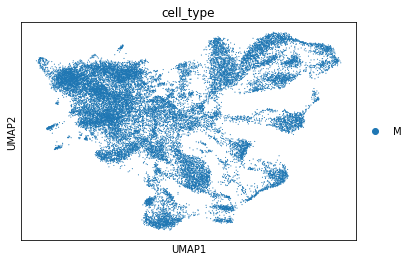

In [20]:
sc.pp.neighbors(rna_m, metric="cosine")
sc.tl.umap(rna_m)
sc.pl.umap(rna_m, color='cell_type')

In [21]:
atac_m.X, atac_m.X.data

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 <memory at 0x1540896c1d40>)

In [22]:
#atac_m = sc.pp.filter_genes(atac_m, min_cells=3)

In [23]:
scglue.data.lsi(atac_m, n_components=100, n_iter=15)

In [24]:
sc.pp.neighbors(atac_m, use_rep="X_lsi", metric="cosine")
sc.tl.umap(atac_m)

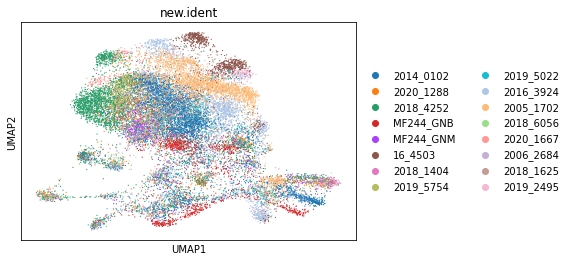

In [25]:
sc.pl.umap(atac_m, color='new.ident')

In [26]:
rna_m.var.head()

,highly_variable,highly_variable_rank,means,variances,variances_norm,mean,std
MIR1302-2HG,False,NaN,0.000000,0.000000,0.000000,0.000000,1.000000
FAM138A,False,NaN,0.000000,0.000000,0.000000,0.000000,1.000000
OR4F5,False,NaN,0.000000,0.000000,0.000000,0.000000,1.000000
AL627309.1,False,NaN,0.001413,0.001411,0.923885,0.000822,0.029219
AL627309.3,False,NaN,0.000039,0.000039,0.999784,0.000037,0.005922


In [27]:
#scglue.data.get_gene_annotation(
#    rna, gtf="gencode.v40.chr_patch_hapl_scaff.annotation.gtf.gz",
#    gtf_by="gene_name"
#)
#rna.var.loc[:, ["chrom", "chromStart", "chromEnd"]].head()
scglue.data.get_gene_annotation(
    rna_m, gtf="gencode.v40.annotation.gtf.gz",
    gtf_by="gene_name"
)
rna_m.var['chromStart'] = rna_m.var['chromStart'].values.astype(int)
rna_m.var['chromEnd'] = rna_m.var['chromEnd'].values.astype(int)
rna_m.var.loc[:, ["chrom", "chromStart", "chromEnd"]].head()

,chrom,chromStart,chromEnd
MIR1302-2HG,chr1,29553,31109
FAM138A,chr1,34553,36081
OR4F5,chr1,65418,71585
AL627309.1,NaN,-9223372036854775808,-9223372036854775808
AL627309.3,NaN,-9223372036854775808,-9223372036854775808


In [28]:
#set(rna.var['strand'])
#rna.var.shape
# adata[adata.obs['clusters'].isin(['1', '2', '3']),:]
# adata = adata[:, gene_filter]
rna_m_nonan = rna_m.var.loc[(rna_m.var['strand'] == '+') | (rna_m.var['strand'] == '-'),:]
#len(list(rna_nonan.index))
#rna[rna.var.index.isin(list(rna_nonan.index)),:]
rna_m = rna_m[:, list(rna_m_nonan.index)]

In [29]:
set(rna_m.var['strand'])

{'+', '-'}

In [30]:
atac_m

AnnData object with n_obs × n_vars = 21170 × 181500
    obs: 'orig.ident', 'nCount_peaks', 'nFeature_peaks', 'TSS_fragments', 'DNase_sensitive_region_fragments', 'enhancer_region_fragments', 'promoter_region_fragments', 'on_target_fragments', 'blacklist_region_fragments', 'peak_region_fragments', 'peak_region_cutsites', 'passed_filters', 'duplicate', 'cell_id', 'is__cell_barcode', 'nucleosome_signal', 'nucleosome_percentile', 'nucleosome_group', 'TSS.enrichment', 'TSS.percentile', 'high.tss', 'pct_reads_in_peaks', 'blacklist_ratio', 'peaks_snn_res.0.8', 'seurat_clusters', 'nCount_RNA', 'nFeature_RNA', 'activ.ident', 'new.ident', 'active.ident', 'ident'
    var: 'n_cells'
    uns: 'X_name', 'neighbors', 'umap', 'new.ident_colors'
    obsm: 'SCOPEN', 'UMAP_SCOPEN', 'X_lsi', 'X_umap'
    layers: 'logcounts'
    obsp: 'distances', 'connectivities'

In [31]:
atac_m.var_names[:5]

Index(['chr1-180767-181706', 'chr1-191211-191834', 'chr1-267823-268193',
       'chr1-586021-586378', 'chr1-605428-605563'],
      dtype='object')

In [32]:
split = atac_m.var_names.str.split(r"[:-]")
atac_m.var["chrom"] = split.map(lambda x: x[0])
atac_m.var["chromStart"] = split.map(lambda x: x[1])
atac_m.var["chromEnd"] = split.map(lambda x: x[2])
atac_m.var.head()

,n_cells,chrom,chromStart,chromEnd
chr1-180767-181706,234,chr1,180767,181706
chr1-191211-191834,137,chr1,191211,191834
chr1-267823-268193,207,chr1,267823,268193
chr1-586021-586378,132,chr1,586021,586378
chr1-605428-605563,51,chr1,605428,605563


In [33]:
graph = scglue.genomics.rna_anchored_prior_graph(rna_m, atac_m)
graph

[WARNING] rna_anchored_prior_graph: Deprecated, please use `rna_anchored_guidance_graph` instead!


window_graph:   0%|          | 0/22738 [00:00<?, ?it/s]

In [34]:
graph.number_of_nodes(), graph.number_of_edges()

(204238, 459428)

In [35]:
# Graph node covers all omic features
all(graph.has_node(gene) for gene in rna_m.var_names), \
all(graph.has_node(peak) for peak in atac_m.var_names)

(True, True)

In [36]:
# Edge attributes contain weights and signs
for _, e in zip(range(5), graph.edges):
    print(f"{e}: {graph.edges[e]}")

('FAM87B', 'chr1-817045-817630', 0): {'dist': 0, 'weight': 1.0, 'sign': 1, 'type': 'fwd'}
('FAM87B', 'FAM87B', 0): {'weight': 1.0, 'sign': 1, 'type': 'loop'}
('chr1-817045-817630', 'FAM87B', 0): {'dist': 0, 'weight': 1.0, 'sign': 1, 'type': 'rev'}
('chr1-817045-817630', 'chr1-817045-817630', 0): {'weight': 1.0, 'sign': 1, 'type': 'loop'}
('LINC00115', 'chr1-826876-827942', 0): {'dist': 0, 'weight': 1.0, 'sign': 1, 'type': 'fwd'}


In [37]:
# Each node has a self-loop
all(graph.has_edge(gene, gene) for gene in rna_m.var_names), \
all(graph.has_edge(peak, peak) for peak in atac_m.var_names)

(True, True)

In [38]:
# Graph is symmetric
all(graph.has_edge(j, i) for i, j, _ in graph.edges)

True

In [39]:
rna_m.write("rna_m_preprocessed.h5ad", compression="gzip")
atac_m.write("atac_m_preprocessed.h5ad", compression="gzip")
nx.write_graphml(graph, "prior_m.graphml.gz")

/home/people/rohit/miniconda3/envs/mypython3/lib/python3.8/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  df[key] = c
/home/people/rohit/miniconda3/envs/mypython3/lib/python3.8/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  df[key] = c


In [40]:
%%script false --no-raise-error
atac = anndata.read_loom(
    "Cluster_myeloid_atac.loom",
    sparse=True,
    X_name="counts",
    obs_names="cell_names",
    var_names="peaks",
    obsm_mapping={
        "X_umap": ["scOpen", "umap_scopen"]
    }
)